In [1]:
import pickle

#### Loading the data

In [6]:
datax = open("trainX.pickle", 'rb')
X_train = pickle.load(datax)
datax.close()

datay = open("trainY.pickle", 'rb')
Y_train = pickle.load(datay)
datay.close()

datat = open("testX.pickle", 'rb')
X_test = pickle.load(datat)
datat.close()

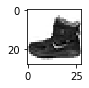

9


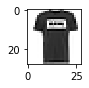

0


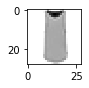

0


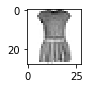

3


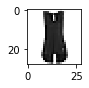

0


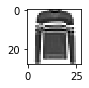

2


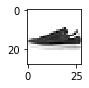

7


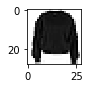

2


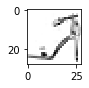

5


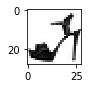

5


In [7]:
import matplotlib.pyplot as plt

for x in range(10):
    plt.figure(figsize=(1,1))
    plt.imshow(X_train[x], cmap=plt.cm.binary)
    plt.show()
    print(Y_train[x])

### dummy testing of the model

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_train, Y_train, test_size=0.1, random_state=1)

In [9]:
import tensorflow as tf

x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

In [12]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs=50)

W0622 12:11:25.330174  4780 deprecation.py:506] From c:\users\dell pc\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\ops\init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Epoch 1/50
54000/54000 [==============================] - 6s 120us/sample - loss: 0.4933 - acc: 0.8197
Epoch 2/50
54000/54000 [==============================] - 6s 106us/sample - loss: 0.3611 - acc: 0.8663
Epoch 3/50
54000/54000 [==============================] - 6s 107us/sample - loss: 0.3237 - acc: 0.8787
Epoch 4/50
54000/54000 [==============================] - 6s 107us/sample - loss: 0.2986 - acc: 0.8880
Epoch 5/50
54000/54000 [==============================] - 6s 106us/sample - loss: 0.2808 - acc: 0.8932
Epoch 6/50
54000/54000 [==============================] - 6s 108us/sample - loss: 0.2634 - acc: 0.9006
Epoch 7/50
54000/54000 [==============================] - 6s 108us/sample - loss: 0.2495 - acc: 0.9057
Epoch 8/50
54000/54000 [==============================] - 6s 107us/sample - loss: 0.2379 - acc: 0.9096
Epoch 9/50
54000/54000 [==============================] - 6s 109us/sample - loss: 0.2255 - acc: 0.9140
Epoch 10/50
54000/54000 [==============================] - 6s 111us/sampl

In [14]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print("Value Loss: ", val_loss)
print("Accuracy: ", val_acc)

6000/6000 [==============================] - 0s 54us/sample - loss: 0.6646 - acc: 0.8873
Value Loss:  0.6645864844520887
Accuracy:  0.88733333


In [15]:
predictions = model.predict([x_test])

import numpy as np

print(np.argmax(predictions[1560]))

0


In [16]:
print(y_test[1560])

0


### Actual training and prediction

In [18]:
import tensorflow as tf

X_train = tf.keras.utils.normalize(X_train, axis=1)
X_test = tf.keras.utils.normalize(X_test, axis=1)

In [19]:
new_model = tf.keras.models.Sequential()
new_model.add(tf.keras.layers.Flatten())
new_model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
new_model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
new_model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

new_model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

new_model.fit(X_train, Y_train, epochs=50)

Epoch 1/50
60000/60000 [==============================] - 8s 129us/sample - loss: 0.4846 - acc: 0.8220
Epoch 2/50
60000/60000 [==============================] - 6s 106us/sample - loss: 0.3540 - acc: 0.8694
Epoch 3/50
60000/60000 [==============================] - 6s 106us/sample - loss: 0.3169 - acc: 0.8815
Epoch 4/50
60000/60000 [==============================] - 6s 108us/sample - loss: 0.2938 - acc: 0.8894
Epoch 5/50
60000/60000 [==============================] - 7s 110us/sample - loss: 0.2748 - acc: 0.8956
Epoch 6/50
60000/60000 [==============================] - 7s 113us/sample - loss: 0.2615 - acc: 0.9011
Epoch 7/50
60000/60000 [==============================] - 6s 106us/sample - loss: 0.2459 - acc: 0.9061
Epoch 8/50
60000/60000 [==============================] - 6s 104us/sample - loss: 0.2363 - acc: 0.9103
Epoch 9/50
60000/60000 [==============================] - 6s 104us/sample - loss: 0.2223 - acc: 0.9143
Epoch 10/50
60000/60000 [==============================] - 6s 104us/sampl

In [20]:
predictions = new_model.predict([X_test])

In [22]:
import pickle

outfile = open("Y_pred.pickle", 'wb')
pickle.dump(predictions, outfile)
outfile.close()

In [23]:
infile = open("Y_pred.pickle", 'rb')
new = pickle.load(infile)
infile.close()

In [24]:
type(new)

numpy.ndarray

In [25]:
#Submitted by:-
#Gagandeep Kaur
#B. tech.
#Guru Nanak Dev University, Amritsar